In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

file_path = 'D:/newcode/dase_introduction/bike.csv'
df = pd.read_csv(file_path)
df = df.drop(columns=['id'])
shanghai_data = df[df['city'] == 1].drop(columns=['city'])
def simplify_hour(hour):
    if 6 <= hour <= 18:
        return 1
    else:
        return 0

shanghai_data['hour'] = shanghai_data['hour'].apply(simplify_hour)

y = shanghai_data['y'].values.reshape(-1, 1)
X = shanghai_data.drop(columns=['y']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'均方根误差 (RMSE): {rmse}')

均方根误差 (RMSE): 0.1652799928539963


C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33852 (\N{CJK UNIFIED IDEOGRAPH-843C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23485 (\N{CJK UNIFIED IDEOGRAPH-5BBD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qb

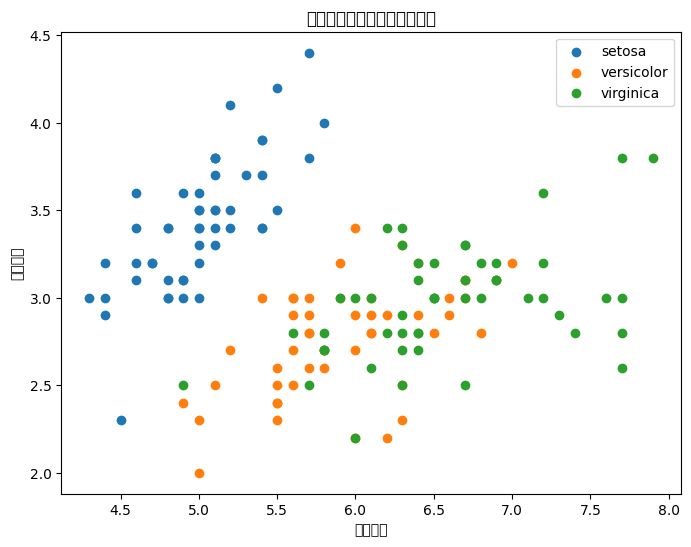

C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tang Yi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qb

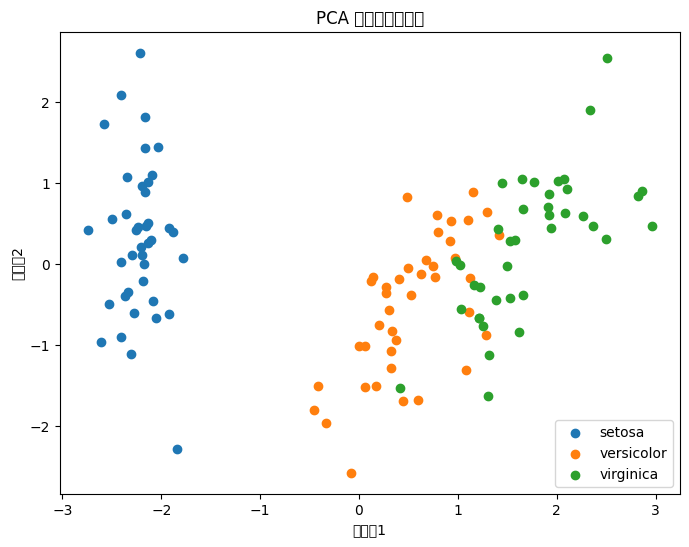

分类准确率: 1.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 绘制花萼长度和花萼宽度的散点图
plt.figure(figsize=(8, 6))
for target in range(3):
    plt.scatter(X[y == target, 0], X[y == target, 1], label=iris.target_names[target])
plt.xlabel('花萼长度')
plt.ylabel('花萼宽度')
plt.legend()
plt.title('花萼长度与花萼宽度的散点图')
plt.show()

# 4. 对数据进行 PCA 降维并可视化降维后的结果
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.figure(figsize=(8, 6))
for target in range(3):
    plt.scatter(X_train_pca[y_train == target, 0], X_train_pca[y_train == target, 1], label=iris.target_names[target])
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.legend()
plt.title('PCA 降维后的散点图')
plt.show()

# 5. 以 K=3 训练分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# 6. 在测试集上进行测试并输出分类准确率
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'分类准确率: {accuracy:.2f}')